# Data Cleaning

Goals for this notebook:
 - Handle missing values
 - Drop high missing value features
 - impute values for columns
 - identify and remove outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load raw data
df = pd.read_csv('../data/train.csv')
print(f"Shape before cleaning: {df.shape}")


Shape before cleaning: (1460, 81)


## Check Missing Values

In [2]:
# Count missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

# Display top missing
missing_df = pd.DataFrame({'Missing Count': missing, '% Missing': missing_percent})
missing_df.head(20)


,Missing Count,% Missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


## Drop Features with >20% Missing

In [3]:
to_drop = missing_percent[missing_percent > 20].index
df = df.drop(columns=to_drop)
print(f"Dropped: {list(to_drop)}")


Dropped: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']


## Impute remaining missing values

- Categorical - Fill with 'None'
- Numerical - Fill with median

In [4]:
# Fill categorical with 'None'
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('None')

# Fill numeric with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Verify missing values are gone
df.isnull().sum().sum()


np.int64(0)

## Detect and Remove Outliers for GrLivArea

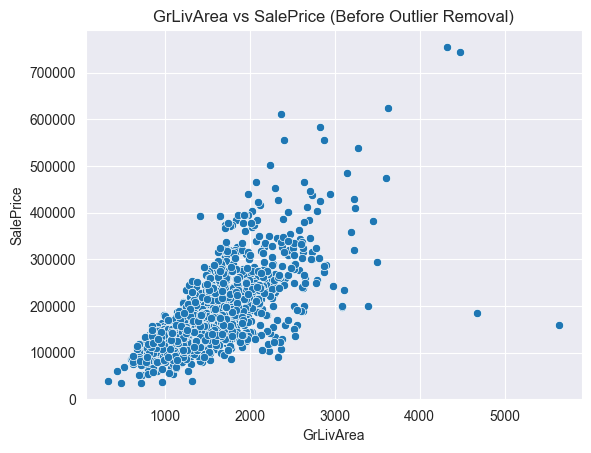

In [5]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.title("GrLivArea vs SalePrice (Before Outlier Removal)")
plt.show()


In [6]:
# Remove outliers: very large area with low price
df = df[~((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]
print(f"Shape after outlier removal: {df.shape}")


Shape after outlier removal: (1458, 75)


## Saving Cleaned Dataset

In [7]:
df.to_csv('../data/cleaned_train.csv', index=False)
print("Cleaned data saved to /data/cleaned_train.csv")


Cleaned data saved to /data/cleaned_train.csv


## Summary

- Dropped features with a lot of missing data
- Imputed remaining missing values (categorical: 'None' and numerical: median)
- Removed known outlier (GrLivArea > 4000 & SalePrice < 300k)
